In [1]:
import pandas as pd
pd.__version__

'2.3.3'

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Storing the data in a pandas data frame.

df = pd.read_csv("data/PewDiePie.csv")
df.head(10)

,Date,Subscribers
0,1,71915
1,2,48270
2,3,47746
3,4,42276
4,5,36867
5,6,28722
6,7,29794
7,8,33125
8,9,27877
9,10,30675


In [4]:
x = df.iloc[:, 0]
x_df = pd.DataFrame(x)
y = df.iloc[:, 1]
print(x_df)
print(y)

    Date
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
0     71915
1     48270
2     47746
3     42276
4     36867
5     28722
6     29794
7     33125
8     27877
9     30675
10    32450
11    45714
12    59377
13    42289
14    36002
15    25872
16    31623
17    46504
18    49421
19    27844
Name: Subscribers, dtype: int64


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size = 0.3)
print(x_test)
print(y_test)
print(x_train)
print(y_train)

    Date
2      3
13    14
6      7
7      8
11    12
16    17
2     47746
13    42289
6     29794
7     33125
11    45714
16    31623
Name: Subscribers, dtype: int64
    Date
18    19
12    13
10    11
9     10
3      4
19    20
5      6
8      9
0      1
4      5
14    15
15    16
17    18
1      2
18    49421
12    59377
10    32450
9     30675
3     42276
19    27844
5     28722
8     27877
0     71915
4     36867
14    36002
15    25872
17    46504
1     48270
Name: Subscribers, dtype: int64


In [6]:
# training a simple linear regression model
simpleLinearRegression = LinearRegression()
simpleLinearRegression.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# test trained model
y_predict = simpleLinearRegression.predict(x_test)
x_test_series = x_test.iloc[:,0]
predict = pd.DataFrame({'X Test': x_test_series, 'Y Predict': y_predict, 'Y Real': y_test})
predict.head(10)

,X Test,Y Predict,Y Real
2,3,45102.412994,47746
13,14,38177.369993,42289
6,7,42584.215539,29794
7,8,41954.666175,33125
11,12,39436.468721,45714
16,17,36288.721902,31623


In [8]:
# model evaluation
rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# printing values
print('Slope:' ,simpleLinearRegression.coef_)
print('Intercept:', simpleLinearRegression.intercept_)
print('Variance score: {}'.format(simpleLinearRegression.score(x_test, y_test)))
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-629.5493637]
Intercept: 46991.06108506363
Variance score: -0.07519157096307305
Root mean squared error:  54437171.95184774
R2 score:  -0.07519157096307305


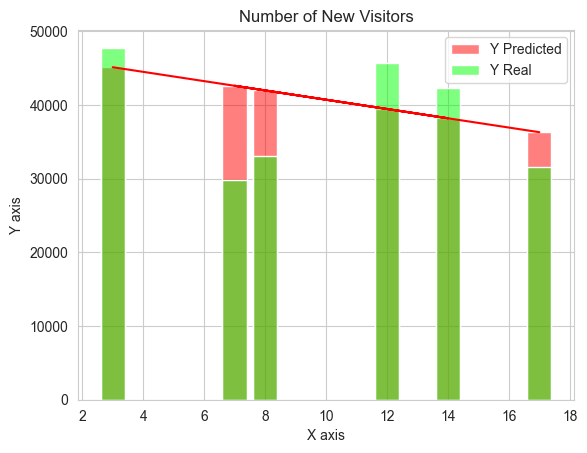

In [9]:
# plotting values

# data points
plt.bar(x_test_series, y_predict, label="Y Predicted", color=[1,0,0, 0.5])
plt.bar(x_test_series, y_test, label="Y Real", color=[0,1,0, 0.5])
plt.plot()

plt.plot(x_test_series, y_predict, color='r')

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Number of New Visitors")
plt.legend()
plt.show()